In [2]:
import pandas as pd 

mn_df=pd.read_csv(r'C:\Users\imagoworks-moongzeee\test\momment_coord_mn_.csv')
mx_df=pd.read_csv(r'C:\Users\imagoworks-moongzeee\test\momment_coord_mx_.csv')

mn_df.drop(['Unnamed: 0'],axis=1,inplace=True)
mx_df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [3]:
mn_df

,X,Y,Label_num,density
0,227,390,1,0.000710
1,237,388,1,0.001036
2,235,387,1,0.001087
3,246,382,1,0.000735
4,214,375,1,0.000144
...,...,...,...,...
10061,424,135,15,0.000404
10062,387,147,15,0.000034
10063,417,151,15,0.001106
10064,430,174,15,0.000075


In [4]:
mx_df

,X,Y,Label_num,density
0,231,392,1,0.001658
1,228,405,1,0.000410
2,237,389,1,0.000983
3,232,413,1,0.000203
4,229,401,1,0.000704
...,...,...,...,...
10089,435,144,15,0.000304
10090,395,149,15,0.000052
10091,415,161,15,0.000228
10092,421,126,15,0.000974


In [5]:
import numpy as np
import scipy.stats
import scipy as sp
from sklearn.preprocessing import StandardScaler

df_z_score=pd.DataFrame()
outlier_idx_list=[]
df_z_score['X']=sp.stats.zscore(mn_df['X'])
df_z_score['Y']=sp.stats.zscore(mn_df['Y'])
outlier_X=df_z_score['X'][(df_z_score['X']>2)|(df_z_score['X']<-2)]
outlier_Y=df_z_score['Y'][(df_z_score['Y']>2)|(df_z_score['Y']<-2)]
outlier_idx_X=list(outlier_X.index)
outlier_idx_Y=list(outlier_Y.index)

mn_df_scaled=mn_df.drop(outlier_idx_X)
mn_df_scaled=mn_df.drop(outlier_idx_Y)


mn_df_scaled

,X,Y,Label_num,density
0,227,390,1,0.000710
1,237,388,1,0.001036
2,235,387,1,0.001087
3,246,382,1,0.000735
4,214,375,1,0.000144
...,...,...,...,...
10060,416,158,15,0.000894
10062,387,147,15,0.000034
10063,417,151,15,0.001106
10064,430,174,15,0.000075


In [6]:
df_z_score=pd.DataFrame()
outlier_idx_list=[]
df_z_score['X']=sp.stats.zscore(mx_df['X'])
df_z_score['Y']=sp.stats.zscore(mx_df['Y'])
outlier_X=df_z_score['X'][(df_z_score['X']>2)|(df_z_score['X']<-2)]
outlier_Y=df_z_score['Y'][(df_z_score['Y']>2)|(df_z_score['Y']<-2)]
outlier_idx_X=list(outlier_X.index)
outlier_idx_Y=list(outlier_Y.index)

mx_df_scaled=mx_df.drop(outlier_idx_X)
mx_df_scaled=mx_df.drop(outlier_idx_Y)

mx_df_scaled

,X,Y,Label_num,density
0,231,392,1,0.001658
1,228,405,1,0.000410
2,237,389,1,0.000983
3,232,413,1,0.000203
4,229,401,1,0.000704
...,...,...,...,...
10089,435,144,15,0.000304
10090,395,149,15,0.000052
10091,415,161,15,0.000228
10092,421,126,15,0.000974


In [7]:
import numpy as np
import scipy.stats
import scipy as sp
from sklearn.preprocessing import StandardScaler


Label_mn=mn_df_scaled['Label_num'].unique()

n_df=pd.DataFrame()
for i in Label_mn:
     pointer=mn_df_scaled['Label_num']==i
     df_=mn_df_scaled[pointer]

     x=df_.X 
     y=df_.Y

     x=np.interp(x, (x.min(),x.max()),(0,1))
     y=np.interp(y, (y.min(),y.max()),(0,1))

     df_['X']=x
     df_['Y']=y
     n_df=pd.concat([n_df,df_])

n_df

<ipython-input-7-456ab27b6850>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['X']=x
<ipython-input-7-456ab27b6850>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Y']=y
<ipython-input-7-456ab27b6850>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

,X,Y,Label_num,density
0,0.230453,0.861314,1,0.000710
1,0.271605,0.854015,1,0.001036
2,0.263374,0.850365,1,0.001087
3,0.308642,0.832117,1,0.000735
4,0.176955,0.806569,1,0.000144
...,...,...,...,...
10060,0.485714,0.188679,15,0.000894
10062,0.071429,0.084906,15,0.000034
10063,0.500000,0.122642,15,0.001106
10064,0.685714,0.339623,15,0.000075


In [8]:
Label_mx=mx_df_scaled['Label_num'].unique()

x_df=pd.DataFrame()
for i in Label_mx:
     pointer=mx_df_scaled['Label_num']==i
     df_=mx_df_scaled[pointer]

     x=df_.X 
     y=df_.Y

     x=np.interp(x, (x.min(),x.max()),(0,1))
     y=np.interp(y, (y.min(),y.max()),(0,1))

     df_['X']=x
     df_['Y']=y
     x_df=pd.concat([x_df,df_])

x_df

<ipython-input-8-b75806701eec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['X']=x
<ipython-input-8-b75806701eec>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_['Y']=y
<ipython-input-8-b75806701eec>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_

,X,Y,Label_num,density
0,0.491935,0.449438,1,0.001658
1,0.467742,0.595506,1,0.000410
2,0.540323,0.415730,1,0.000983
3,0.500000,0.685393,1,0.000203
4,0.475806,0.550562,1,0.000704
...,...,...,...,...
10089,0.661290,0.298969,15,0.000304
10090,0.016129,0.350515,15,0.000052
10091,0.338710,0.474227,15,0.000228
10092,0.435484,0.113402,15,0.000974


In [9]:
mn_grouped=n_df.groupby('Label_num',as_index=True).var()
mn_grouped['X'].sort_values()

Label_num
9     0.005336
1     0.006105
11    0.009332
10    0.009409
12    0.012888
2     0.014790
4     0.015205
3     0.016168
13    0.016336
5     0.017339
14    0.017394
7     0.017968
15    0.020049
6     0.021548
Name: X, dtype: float64

In [10]:
mn_grouped['Y'].sort_values()

Label_num
9     0.003689
1     0.003828
11    0.015450
14    0.017207
12    0.018231
6     0.018350
13    0.019569
3     0.020004
10    0.020749
4     0.021466
5     0.022823
2     0.024828
7     0.025964
15    0.030254
Name: Y, dtype: float64

In [11]:
mx_grouped=x_df.groupby('Label_num',as_index=True).var()
mx_grouped['X'].sort_values()

Label_num
13    0.002516
9     0.010844
1     0.011514
2     0.013028
10    0.013478
12    0.014423
3     0.015677
11    0.016531
4     0.017559
5     0.020418
6     0.022170
14    0.023177
7     0.026433
15    0.029128
Name: X, dtype: float64

In [12]:
mx_grouped['Y'].sort_values()

Label_num
13    0.008068
6     0.016530
10    0.017485
11    0.018200
14    0.019528
3     0.020707
5     0.020843
9     0.021571
12    0.023379
1     0.023752
2     0.025853
4     0.029161
15    0.029171
7     0.030250
Name: Y, dtype: float64

In [20]:
n_grouped=n_df.groupby('Label_num',as_index=True)
groups=list(n_grouped.groups)
groups

[1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14, 15]

In [21]:
#get_group(그룹name)함수로 그룹별 데이터프레임 조사
n_grouped.get_group(1)

,X,Y,Label_num,density
0,0.230453,0.861314,1,0.000710
1,0.271605,0.854015,1,0.001036
2,0.263374,0.850365,1,0.001087
3,0.308642,0.832117,1,0.000735
4,0.176955,0.806569,1,0.000144
...,...,...,...,...
714,0.263374,0.879562,1,0.000607
715,0.308642,0.854015,1,0.000615
716,0.255144,0.839416,1,0.001068
717,0.201646,0.791971,1,0.000192


In [29]:
label=n_df['Label_num'].unique()
label

array([ 1,  2,  3,  4,  5,  6,  7,  9, 10, 11, 12, 13, 14, 15],
      dtype=int64)

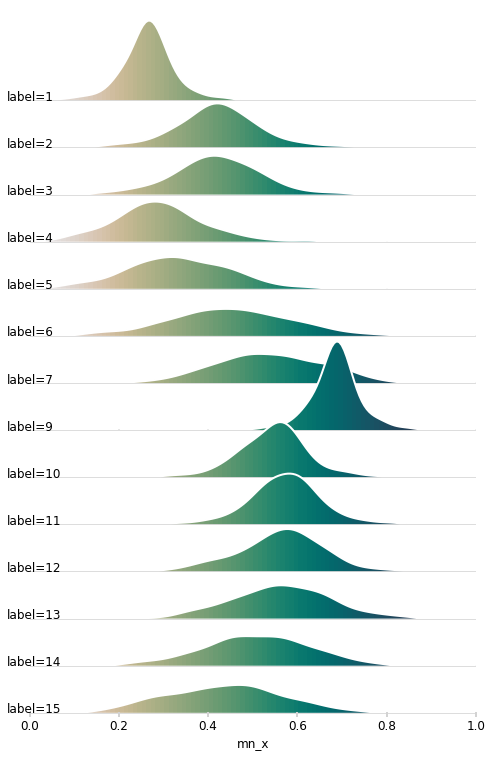

In [52]:
import cmocean  as cmo 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

label=n_df['Label_num'].unique()

fig, axs=plt.subplots(nrows=14, figsize=(8,13), sharex=True, sharey=True)
fig.set_facecolor('none')
x=np.linspace(0,1,100)
    
for i, ax in zip(label, axs) :
    sns.kdeplot(n_df.query(f"Label_num=={i}")['X'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(0,1)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.rain',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )

    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)

    ax.text(-0.05,0.05, f"label={i}",fontdict={"fontsize":"large"})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 15:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('mn_x', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')

fig.subplots_adjust(hspace=-0.5)


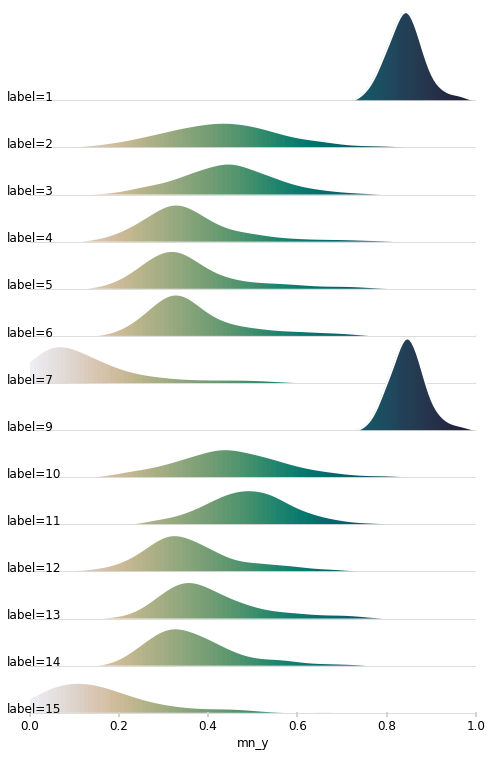

In [54]:
import cmocean  as cmo 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

label=n_df['Label_num'].unique()

fig, axs=plt.subplots(nrows=14, figsize=(8,13), sharex=True, sharey=True)
fig.set_facecolor('none')
x=np.linspace(0,1,100)
    
for i, ax in zip(label, axs) :
    sns.kdeplot(n_df.query(f"Label_num=={i}")['Y'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(0,1)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.rain',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )

    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)

    ax.text(-0.05,0.05, f"label={i}",fontdict={"fontsize":"large"})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 15:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('mn_y', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')

fig.subplots_adjust(hspace=-0.5)


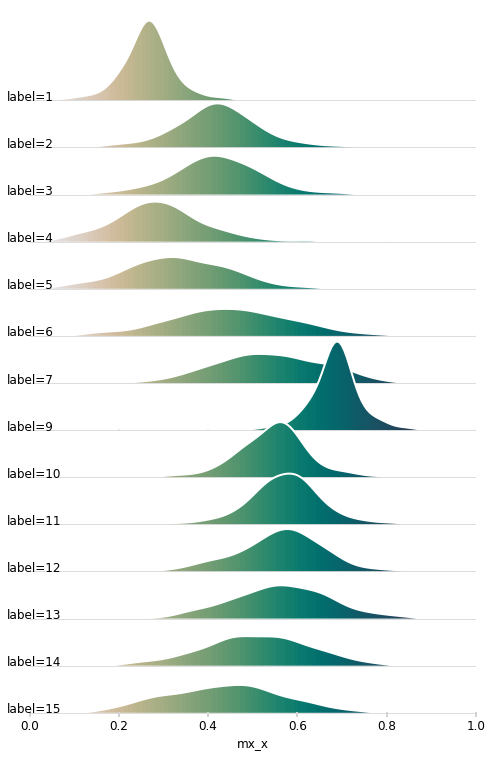

In [55]:
label=x_df['Label_num'].unique()

fig, axs=plt.subplots(nrows=14, figsize=(8,13), sharex=True, sharey=True)
fig.set_facecolor('none')
x=np.linspace(0,1,100)
    
for i, ax in zip(label, axs) :
    sns.kdeplot(n_df.query(f"Label_num=={i}")['X'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(0,1)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.rain',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )

    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)

    ax.text(-0.05,0.05, f"label={i}",fontdict={"fontsize":"large"})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 15:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('mx_x', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')

fig.subplots_adjust(hspace=-0.5)

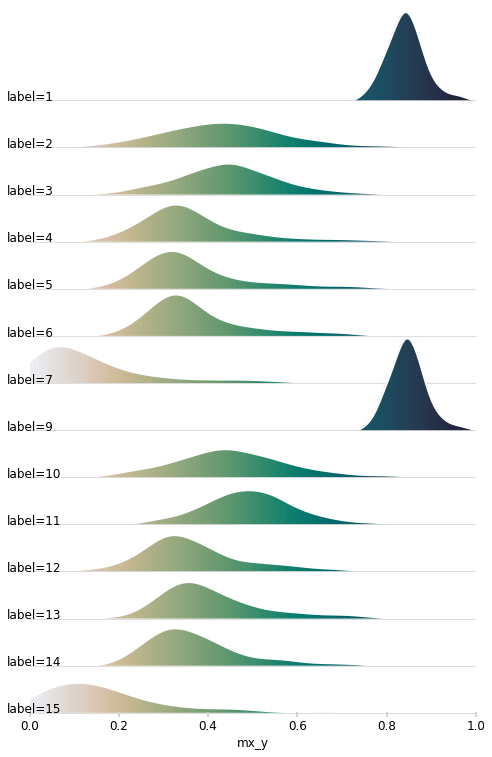

In [56]:
label=x_df['Label_num'].unique()

fig, axs=plt.subplots(nrows=14, figsize=(8,13), sharex=True, sharey=True)
fig.set_facecolor('none')
x=np.linspace(0,1,100)
    
for i, ax in zip(label, axs) :
    sns.kdeplot(n_df.query(f"Label_num=={i}")['Y'], 
                fill=True, color='w',alpha=0, linewidth=2, legend=False, ax=ax)

    ax.set_xlim(0,1)

    im = ax.imshow(np.vstack([x,x]),
        cmap='cmo.rain',
        aspect='auto',
        extent=[*ax.get_xlim(),*ax.get_ylim()]
        )

    path=ax.collections[0].get_paths()[0]
    patch=mpl.patches.PathPatch(path,transform=ax.transData)
    im.set_clip_path(patch)

    ax.text(-0.05,0.05, f"label={i}",fontdict={"fontsize":"large"})

    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)

    if i != 15:
        ax.tick_params(axis='x',length=0)
    else:
        ax.tick_params(axis='x', direction='inout', color='lightgrey', length=5, width=2, labelsize='large')
        ax.set_xlabel('mx_y', fontdict={'fontsize':'large'})

    ax.set_yticks([])
    ax.set_ylabel('')


    xticks=ax.get_xticks()
    for xtick in xticks:
        ax.plot([xtick,xtick],[0,0.065],color='lightgray',zorder=0)

    ax.axhline(0,color='lightgray')
    ax.set_facecolor('none')

fig.subplots_adjust(hspace=-0.5)